# A Linear Regression Project.

## Exploring the relationship between the marketing costs and sales generated

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Loading the data

data = pd.read_csv('marketing_data.csv')

In [3]:
data.head()  # Generating an overview of the dataset

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()    # Information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
 # Data Cleaning, dropping untitled columns

data = data.drop(columns=['Unnamed: 0'])  
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
import seaborn as sns

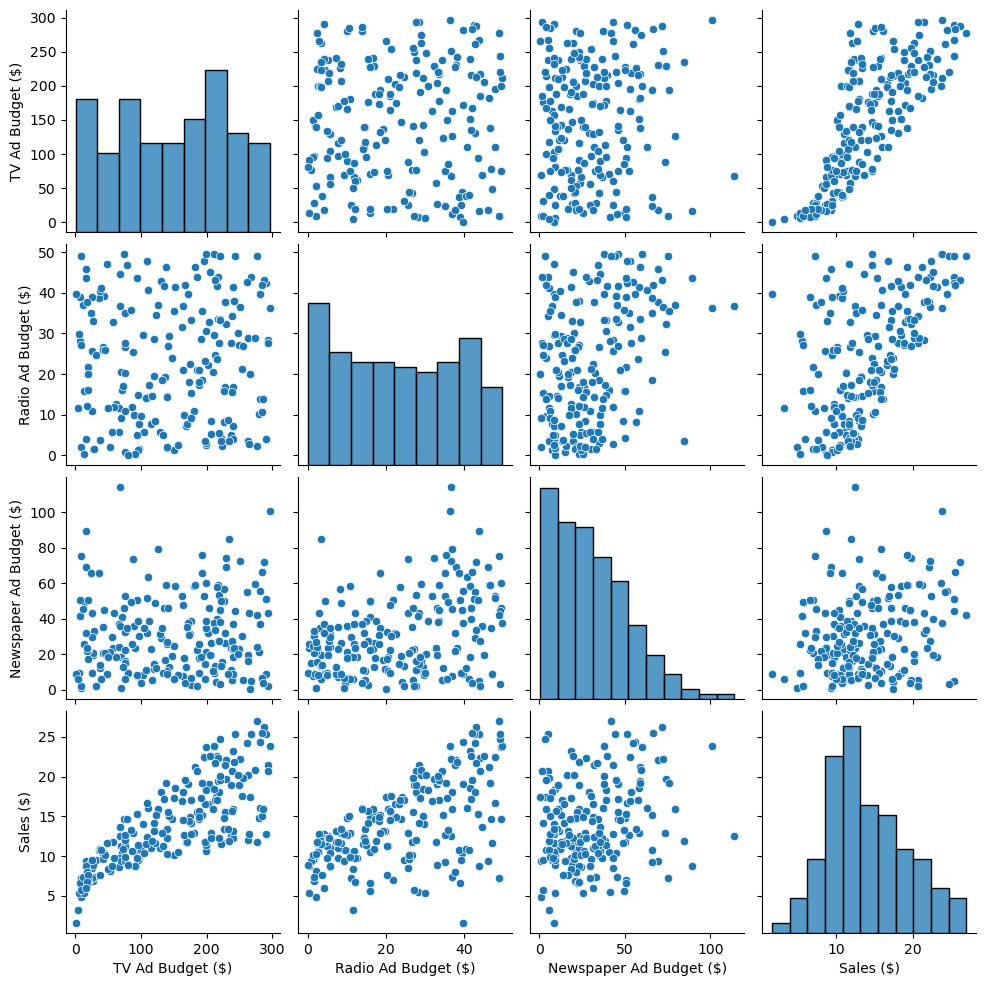

In [7]:
## Exploratory Data Anaylysis

sns.pairplot(data)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV Ad Budget ($),200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio Ad Budget ($),200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper Ad Budget ($),200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales ($),200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
# Data split into Features and Target Variables

y = data['Sales ($)']
X = data.drop(columns=['Sales ($)'])

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
# Train and Test data generation using the sklearn library

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Model Development

from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
sales_average = data['Sales ($)'].mean()

sales_average

14.022500000000003

In [18]:
mae_sales = mean_absolute_error(y_test, y_pred)
mae_sales

1.4937750024728969

In [19]:
mse_sales = mean_squared_error(y_test, y_pred)
mse_sales

3.7279283306815114

In [32]:
# Model Parameters - Coefficients and Intercept

print(f'The model coefficients are: {np.round(model.coef_,4)}')
print(f'The model intercept is: {np.round(model.intercept_,4)}')

B1, B2, B3 = np.round(model.coef_,4)
B0 = np.round(model.intercept_)

The model coefficients are: [0.0447 0.1966 0.0061]
The model intercept is: 2.7581


In [33]:
## The equation of the model is as follows

print(f'Sales = {B0} + {B1}*(TV Ad Budget) + {B2}*(Radio Ad Budget) + {B3}*(Newspaper Ad Budget)')


Sales = 3.0 + 0.0447*(TV_Budget) + 0.1966*(Radio Ad) + 0.0061*(Newspaper)


In [30]:
data

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
